In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape


(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

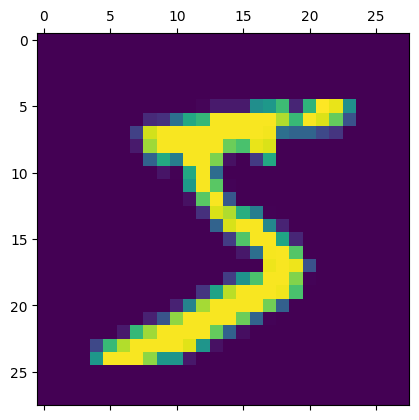

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
y_train[:5]


array([5, 0, 4, 1, 9], dtype=uint8)

flattening the dataset

In [10]:
X_train.shape

(60000, 28, 28)

scale the datasets

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:

X_train_Flattenned = X_train.reshape(len(X_train),28*28)
X_test_Flattenned = X_test.reshape(len(X_test),28*28)


In [13]:
X_train_Flattenned.shape ,X_test_Flattenned.shape


((60000, 784), (10000, 784))

Define Neural Networks

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

tf_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)
# to run the logs dir in terminal with relative path  = tensorboard --logdir logs/
model.compile(
    # optimizer='adam',
    optimizer='SGD',
    
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_Flattenned, y_train, epochs=5,callbacks=[tf_callback])

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7199 - loss: 1.1228
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8786 - loss: 0.4751
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8890 - loss: 0.4115
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8973 - loss: 0.3777
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8987 - loss: 0.3624


In [15]:
model.evaluate(X_test_Flattenned, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8942 - loss: 0.3838


[0.3349071443080902, 0.9089000225067139]

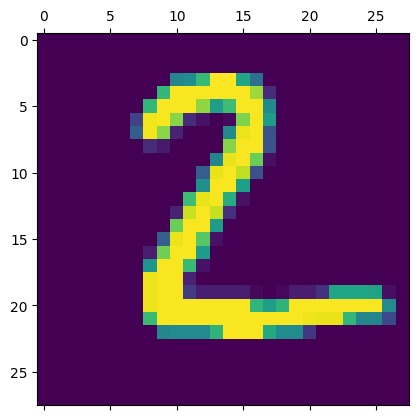

In [16]:
plt.matshow(X_test[1])

In [17]:
y_pred = model.predict(X_test_Flattenned)
y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9.0974295e-01, 1.6328235e-01, 9.9807841e-01, 9.0942085e-01,
       3.1957234e-04, 9.1328681e-01, 9.8257792e-01, 2.8653457e-04,
       8.5621238e-01, 2.8548914e-03], dtype=float32)

In [18]:
np.argmax(y_pred[1])

2

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
y_predected_label=[np.argmax(i) for i in y_pred]
y_predected_label[:5]

[7, 2, 1, 0, 4]

In [21]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predected_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    3,    2,    0,    5,    7,    1,    4,    0],
       [   0, 1109,    2,    3,    1,    2,    4,    1,   13,    0],
       [  11,   10,  890,   14,   16,    1,   15,   20,   46,    9],
       [   5,    2,   22,  895,    0,   35,    4,   15,   18,   14],
       [   1,    4,    4,    0,  909,    1,   11,    1,    8,   43],
       [  12,    4,    4,   37,   12,  755,   17,   11,   32,    8],
       [  17,    3,    6,    2,   13,   15,  896,    1,    5,    0],
       [   2,   19,   25,    4,   10,    0,    0,  927,    3,   38],
       [   9,   11,   10,   20,    8,   27,   12,   12,  849,   16],
       [  11,    8,    5,   10,   37,   12,    0,   18,    7,  901]])>

Text(95.72222222222221, 0.5, 'Truth')

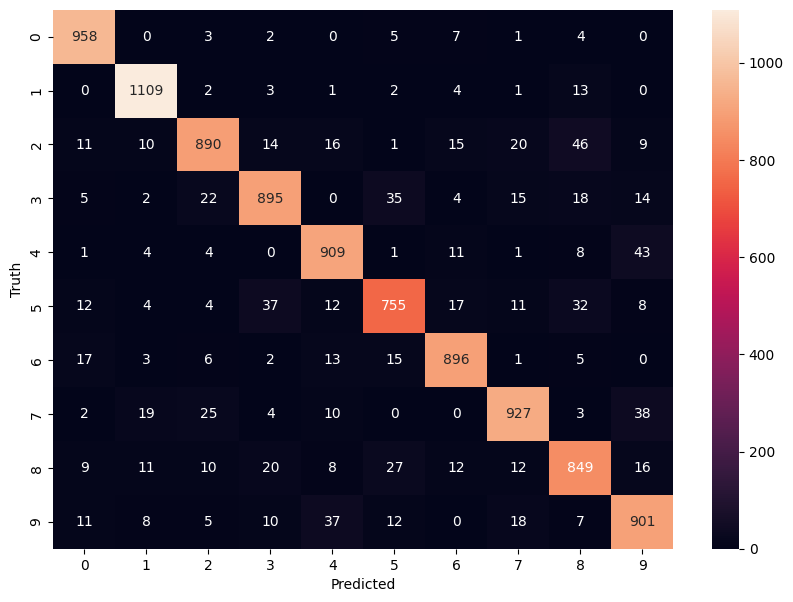

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Hidden Layer

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_Flattenned, y_train, epochs=5)

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7527 - loss: 0.8202
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9187 - loss: 0.2831
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.2532
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9321 - loss: 0.2372
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9344 - loss: 0.2266


In [24]:
model.evaluate(X_test_Flattenned, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9207 - loss: 0.2690


[0.23920409381389618, 0.9309999942779541]

Text(95.72222222222221, 0.5, 'Truth')

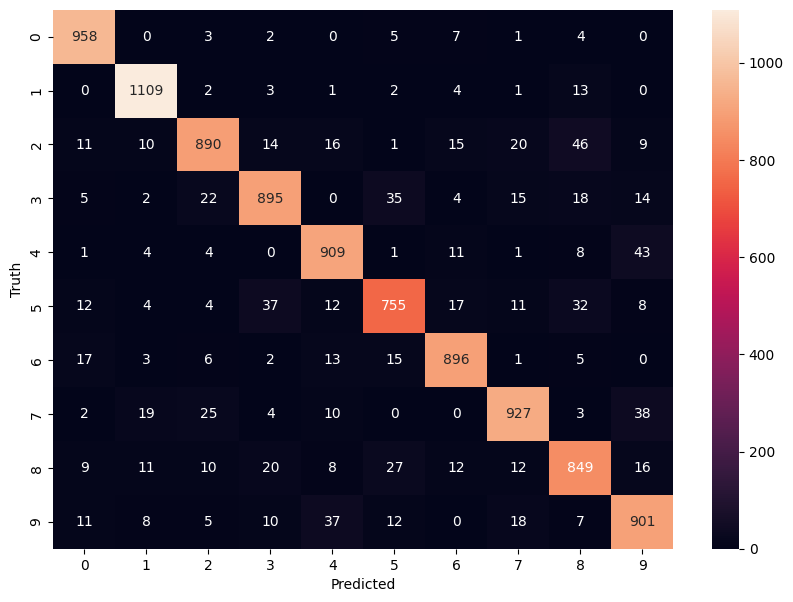

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,  activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8732 - loss: 0.4459
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9607 - loss: 0.1350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9739 - loss: 0.0868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0644
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0509
